## Preprocessing

In [31]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import os
import datetime


#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [32]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME' 'STATUS', 'SPECIAL_CONSIDERATIONS', 'ASK_AMT'.
application_df = application_df.drop(columns = ['EIN', 'NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS','ASK_AMT'])
application_df


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,1
...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,0
34297,T5,Independent,C3000,ProductDev,Association,0,1


In [33]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,1


In [34]:
# Determine the number of unique values in each column
unique_counts = application_df.nunique()

# Display the number of unique values in each column
print(unique_counts)


APPLICATION_TYPE    17
AFFILIATION          6
CLASSIFICATION      71
USE_CASE             5
ORGANIZATION         4
INCOME_AMT           9
IS_SUCCESSFUL        2
dtype: int64


In [35]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_counts



APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [36]:
#  Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 528

# Create a list of application types to be replaced
application_types_to_replace = application_type_counts[application_type_counts < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app, "Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()


APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [37]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
print(classification_counts)




CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [38]:
# Choose a cutoff value
cutoff_value = 1883

# Create a list of classifications to be replaced
classifications_to_replace = classification_counts[classification_counts < cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, "Other")

# Check to make sure binning was successful
print(application_df['CLASSIFICATION'].value_counts())


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [39]:
# Convert categorical data to numeric using pd.get_dummies()
application_df_encoded = pd.get_dummies(application_df)

# Display the encoded DataFrame
application_df_encoded


,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,0,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,False,False,False,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,1,False,False,False,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
34295,0,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
34296,0,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
34297,1,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [40]:
# Features array (X) - contains all columns except the target column
X = application_df_encoded.drop(columns=['IS_SUCCESSFUL'])

# Target array (y) - contains only the target column
y = application_df_encoded['IS_SUCCESSFUL']

# Split the preprocessed data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the datasets to verify the split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25724, 39)
(8575, 39)
(25724,)
(8575,)


In [41]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [42]:
# Define the model - deep neural net i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# Number of input features
input_features = X_train.shape[1]

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3200      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5661 (22.11 KB)
Trainable params: 5661 (22.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# Compile the model (FIRST ATTEMPT)
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
# Train the model (FIRST ATTEMPT)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 7s 7ms/step - loss: 0.5689 - accuracy: 0.7212
Epoch 2/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5555 - accuracy: 0.7280
Epoch 3/100
804/804 [==============================] - 7s 8ms/step - loss: 0.5527 - accuracy: 0.7278
Epoch 4/100
804/804 [==============================] - 6s 7ms/step - loss: 0.5505 - accuracy: 0.7304
Epoch 5/100
804/804 [==============================] - 10s 13ms/step - loss: 0.5494 - accuracy: 0.7305
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5488 - accuracy: 0.7319
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5472 - accuracy: 0.7313
Epoch 8/100
804/804 [==============================] - 5s 7ms/step - loss: 0.5472 - accuracy: 0.7332
Epoch 9/100
804/804 [==============================] - 4s 6ms/step - loss: 0.5464 - accuracy: 0.7312
Epoch 10/100
804/804 [==============================] - 7s 9ms/step - loss: 0.5462 - acc

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5639 - accuracy: 0.7272 - 644ms/epoch - 2ms/step
Loss: 0.5639069080352783, Accuracy: 0.7272303104400635


Attempt #2 -- adding a hidden layer
APPLICATION_TYPE cutoff = 600
CLASSIFICATION cutoff = 1883
layer1 = 80 : activation function = relu
layer2 = 30 : activation function = relu
layer3 = 10 : activation function = relu

In [45]:

# Define the model - deep neural net i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# Number of input features
input_features = X_train.shape[1]

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))
# Third hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                3200      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5951 (23.25 KB)
Trainable params: 5951 (23.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
 # Compile the model (FIRST ATTEMPT)
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
# Train the model (SECOND ATTEMPT)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)


Epoch 1/100
804/804 [==============================] - 6s 5ms/step - loss: 0.5676 - accuracy: 0.7209
Epoch 2/100
804/804 [==============================] - 7s 9ms/step - loss: 0.5539 - accuracy: 0.7288
Epoch 3/100
804/804 [==============================] - 8s 9ms/step - loss: 0.5506 - accuracy: 0.7300
Epoch 4/100
804/804 [==============================] - 6s 7ms/step - loss: 0.5494 - accuracy: 0.7322
Epoch 5/100
804/804 [==============================] - 9s 11ms/step - loss: 0.5485 - accuracy: 0.7321
Epoch 6/100
804/804 [==============================] - 5s 7ms/step - loss: 0.5476 - accuracy: 0.7314
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5468 - accuracy: 0.7316
Epoch 8/100
804/804 [==============================] - 12s 15ms/step - loss: 0.5460 - accuracy: 0.7333
Epoch 9/100
804/804 [==============================] - 10s 12ms/step - loss: 0.5454 - accuracy: 0.7334
Epoch 10/100
804/804 [==============================] - 11s 14ms/step - loss: 0.5447 -

In [48]:
# Evaluate the model using the test data (SECOND ATTEMPT)
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5667 - accuracy: 0.7284 - 536ms/epoch - 2ms/step
Loss: 0.5666833519935608, Accuracy: 0.728396475315094


Attempt #3 -- changing the activation functions
APPLICATION_TYPE cutoff = 528
CLASSIFICATION cutoff = 1883
layer1 = 80 : activation function = relu
layer2 = 30 : activation function = tanh
layer3 = 10 : activation function = tanh





In [50]:
# (THIRD ATTEMPT
nn = tf.keras.models.Sequential()

# Number of input features
input_features = X_train.shape[1]

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='tanh'))
# Third hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 80)                3200      
                                                                 
 dense_13 (Dense)            (None, 30)                2430      
                                                                 
 dense_14 (Dense)            (None, 10)                310       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5951 (23.25 KB)
Trainable params: 5951 (23.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
 # Compile the model (FIRST ATTEMPT)
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
# Train the model (SECOND ATTEMPT)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)


Epoch 1/100
804/804 [==============================] - 8s 8ms/step - loss: 0.5675 - accuracy: 0.7223
Epoch 2/100
804/804 [==============================] - 10s 12ms/step - loss: 0.5548 - accuracy: 0.7288
Epoch 3/100
804/804 [==============================] - 10s 13ms/step - loss: 0.5521 - accuracy: 0.7304
Epoch 4/100
804/804 [==============================] - 6s 8ms/step - loss: 0.5503 - accuracy: 0.7297
Epoch 5/100
804/804 [==============================] - 9s 11ms/step - loss: 0.5488 - accuracy: 0.7313
Epoch 6/100
804/804 [==============================] - 9s 12ms/step - loss: 0.5477 - accuracy: 0.7313
Epoch 7/100
804/804 [==============================] - 7s 9ms/step - loss: 0.5469 - accuracy: 0.7317
Epoch 8/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5465 - accuracy: 0.7325
Epoch 9/100
804/804 [==============================] - 5s 7ms/step - loss: 0.5455 - accuracy: 0.7336
Epoch 10/100
804/804 [==============================] - 11s 14ms/step - loss: 0.5448

In [53]:
# Evaluate the model using the test data (SECOND ATTEMPT)
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5578 - accuracy: 0.7308 - 783ms/epoch - 3ms/step
Loss: 0.5578222274780273, Accuracy: 0.7308454513549805


<Axes: >

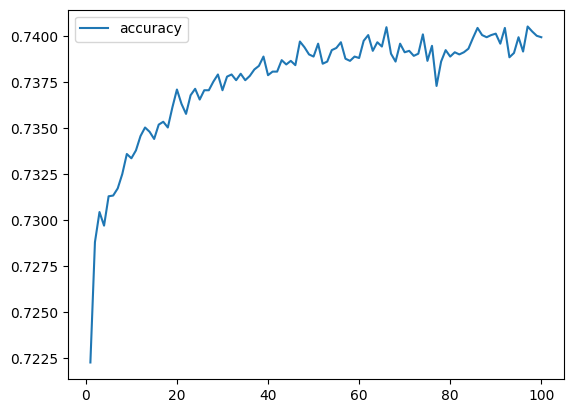

In [54]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [55]:
# Export our model to HDF5 file
filepath = r"\Users\elenamaksimova@Elenas-Air\Desktop\deep-learning-challenge\AlphabetSoupCharity_Optimization.h5."
nn.save(filepath, save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
